Import all the necessary library

In [46]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ppscore as pps
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Load Data

In [14]:
#import the dataset
dataset = pd.read_csv('../databases/Cars.csv')

In [15]:
#siplay first six rows of the dataset
dataset.head(6)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [16]:
#display column name, null/not null with their corresponding data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [17]:
#check the number of data samples
dataset.shape

(8128, 13)

2. Exploratory Data Analysis

This section covers removal of unnecessary data, splitting name, and all.

In [18]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [19]:
#creating a function to get float value splitting any strings from it.
def getFloatValues(featureValues):
    # Create a new NumPy array to store the result
    result = np.zeros_like(featureValues, dtype=float)
    
    # Iterate over the elements of the input array
    for index, x in np.ndenumerate(featureValues):
        if isinstance(x, str):
            try:
                # Attempt to split the string and convert to float
                parts = x.split(' ')
                if parts:
                    result[index] = float(parts[0])
            except ValueError:
                # If conversion fails, set the result to 0
                result[index] = 0.0
        else:
            # If it's already a float, copy it to the result
            result[index] = x
    
    return result


In [20]:
#Remove string and convert to float
dataset['engine'] = getFloatValues(dataset['engine'])
dataset['engine'] = dataset['engine'].astype(float)
#Remove string and convert to float
dataset['max_power'] = getFloatValues(dataset['max_power'])
dataset['max_power'] = dataset['max_power'].astype(float)
#Remove string and convert to float
dataset['mileage'] = getFloatValues(dataset['mileage'])
dataset['mileage'] = dataset['mileage'].astype(float)
#drop columns torque as it is not necessary
dataset = dataset.drop('torque', axis = 1)
#Keep only the first word in the "name" column
dataset['name'] = dataset['name'].map(lambda x : x.split(' ')[0])
#As higher values make the model unstable, using log 
dataset['selling_price'] = np.log(dataset['selling_price'])
# Excluding rows with CNG and LPG from fuel
dataset = dataset[dataset['fuel']!= ('CNG')]
dataset = dataset[dataset['fuel']!= ('LPG')]
# other way to do this
# dataset = dataset[~dataset['fuel'].isin(['CNG','LPG'])]
dataset = dataset[dataset['owner']!= ('Test Drive Car')]

In [45]:
dataset['owner'].unique()
map = dataset['owner'] = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4
}

In [21]:
#getting all the null values
dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [22]:
# #Filling null values with median
df = dataset.copy()
# df = dataset.fillna(dataset.median())
df['engine'].fillna(df['engine'].median(), inplace = True)
df['mileage'].fillna(df['mileage'].median(), inplace = True)
df['max_power'].fillna(df['max_power'].median(), inplace = True)


In [23]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
seats            214
dtype: int64

In [24]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../databases/cleaned_data.csv', index=False)


2.1 Univariate Analysis

CountPlot

<Axes: xlabel='fuel', ylabel='count'>

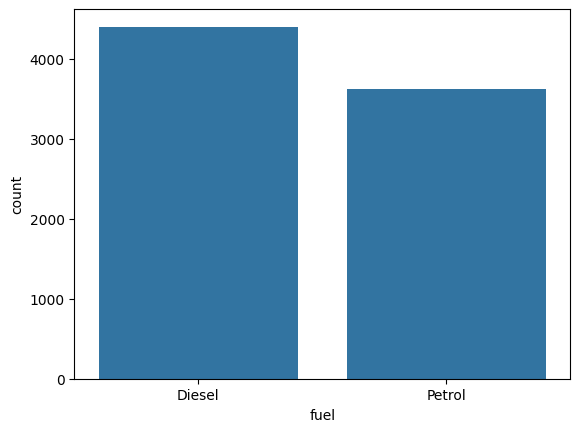

In [25]:
#creating a countplot counting no.of diesel and petrol car
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='seller_type', ylabel='count'>

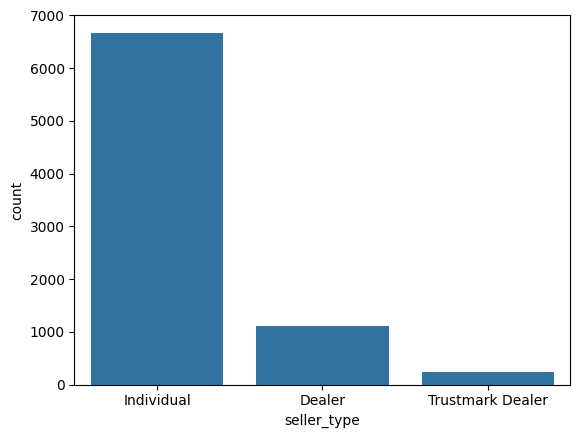

In [26]:
#same is for seller type
sns.countplot(data = df, x = 'seller_type')

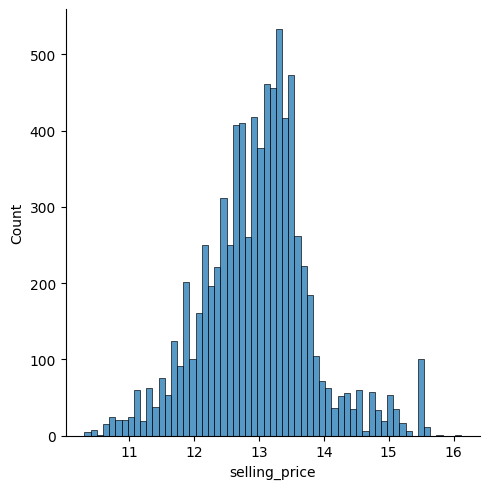

In [27]:
#same for selling price but using distribution plot which is used to plot continuos value
sns.displot(data = df, x = 'selling_price')

2.2 Multivariate Analysis

Box Plot

Text(0, 0.5, 'Mileage')

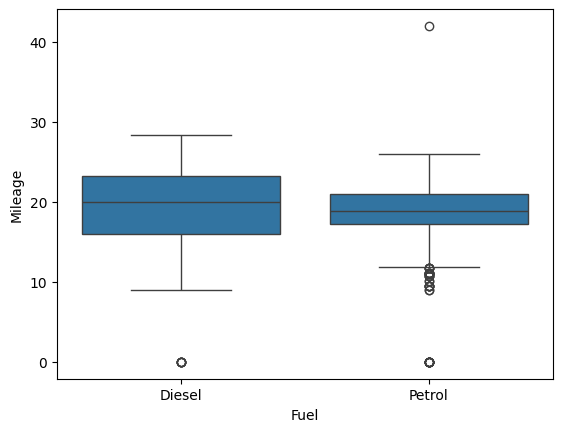

In [28]:
#creating a box plot for fuel and mileage
sns.boxplot(data = df, x = dataset['fuel'], y = dataset['mileage'])
plt.xlabel('Fuel')
plt.ylabel('Mileage')

Label Encoder

In [52]:
le = LabelEncoder()
#Creating a list of features
cat_features = ['name', 'seller_type', 'fuel', 'transmission', 'owner']

# Label encoding the features which are in the list above
for feature in cat_features:
    df[feature] = le.fit_transform(df[feature])
    le.transform(le.classes_)


In [53]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,13.017003,145500,0,1,1,0,23.40,1248.0,74.00,5.0
1,27,2014,12.821258,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,10,2006,11.970350,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,11,2010,12.323856,127000,0,1,1,0,23.00,1396.0,90.00,5.0
4,20,2007,11.775290,120000,1,1,1,0,16.10,1298.0,88.20,5.0


Correlation Matrix

Correlation matrix is used to determine the relation between the features and predicting y. 

<Axes: >

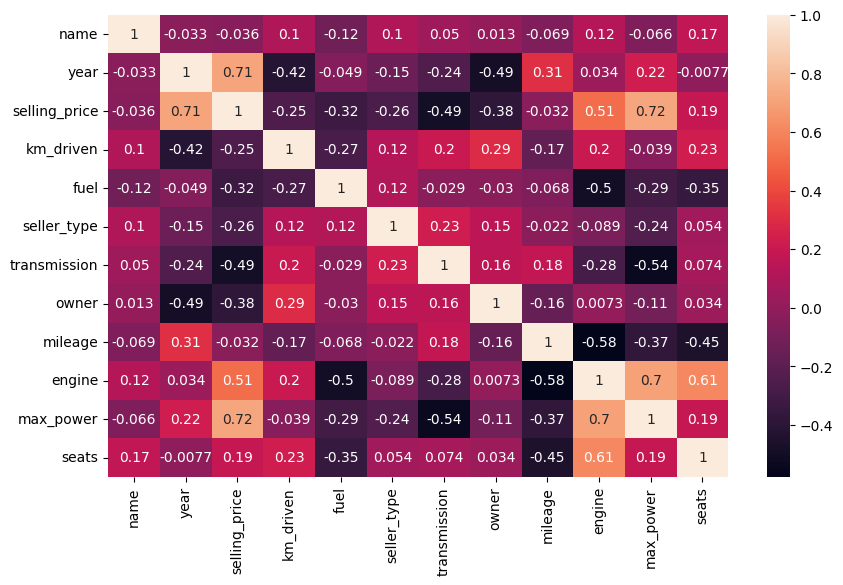

In [54]:
#creating a correlation matrix. 
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)
# dataset.corr()

In [30]:
df.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.712151,-0.417761,0.311974,0.033618,0.224948,-0.007718
selling_price,0.712151,1.000000,-0.250714,-0.031535,0.513627,0.717193,0.187066
km_driven,-0.417761,-0.250714,1.000000,-0.172344,0.202024,-0.038668,0.228646
mileage,0.311974,-0.031535,-0.172344,1.000000,-0.577049,-0.371401,-0.454411
engine,0.033618,0.513627,0.202024,-0.577049,1.000000,0.701476,0.610481
max_power,0.224948,0.717193,-0.038668,-0.371401,0.701476,1.000000,0.189248
seats,-0.007718,0.187066,0.228646,-0.454411,0.610481,0.189248,1.000000


So, according to the correlation matrix, we can clearly assume that maximum power and engine size has major relation with the target variable. So, as the engine size and max power increase, the predicted price of the car should also increase. 
But, if we take a real world example, mileage and km_driven plays a vital role in reducing car price which is also negatively correlated in the above correlation matrix. For now, lets take max_power and engine size for the prediction

Predictive Power Score

PPScore is used to find good predictors for the target column..

<Axes: xlabel='x', ylabel='y'>

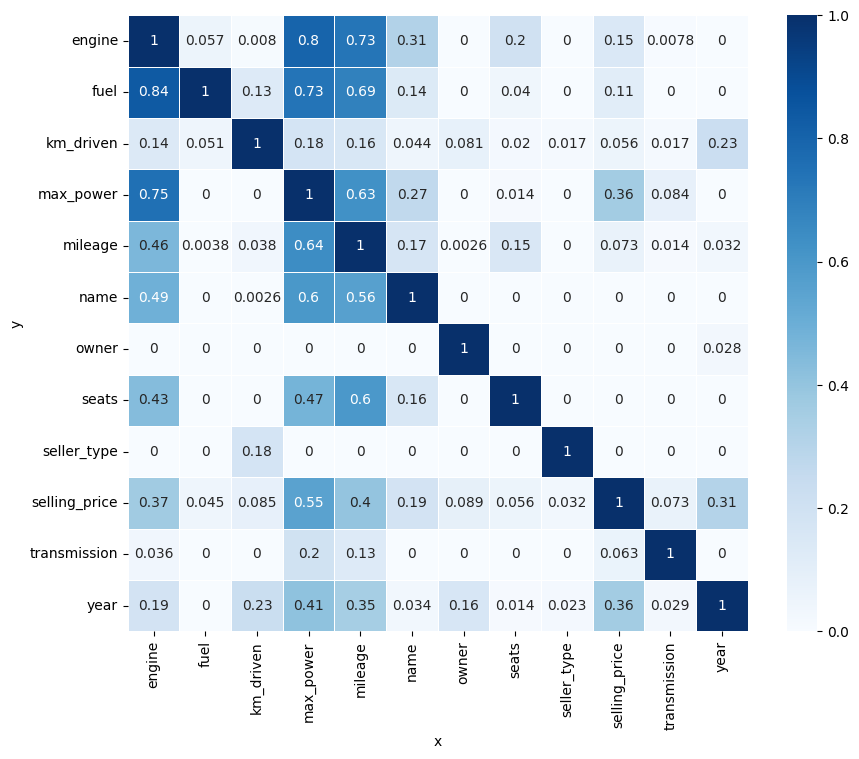

In [55]:
datasetcopy = df.copy()
matrix_df = pps.matrix(datasetcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
#plotting
plt.figure(figsize = (10,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", annot = True, linewidths=0.6)

Feature Selection

We have selected maximum power and engine size as our strongest feature

In [32]:
#X is the feature and y is simply the selling price. 
X = df[['max_power', 'engine']]
y = df['selling_price']

Training Testing Set Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [34]:
#Checking any null values in testing and training set
X_train.isnull().sum(), X_test.isnull().sum(),
# y_train.isnull().sum(), y_test.isnull().sum()

(max_power    0
 engine       0
 dtype: int64,
 max_power    0
 engine       0
 dtype: int64)

In [35]:

y_train.isnull().sum(), y_test.isnull().sum()

(0, 0)

Since there is no null values, lets plot some with distribution plot for the strong feature

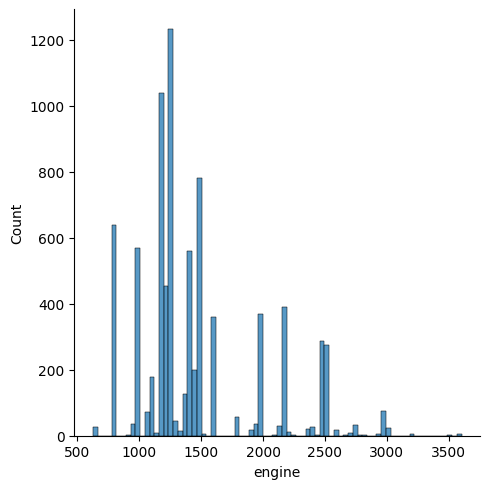

In [57]:
# Distribution plot for engine
sns.displot(data=df, x = 'engine')


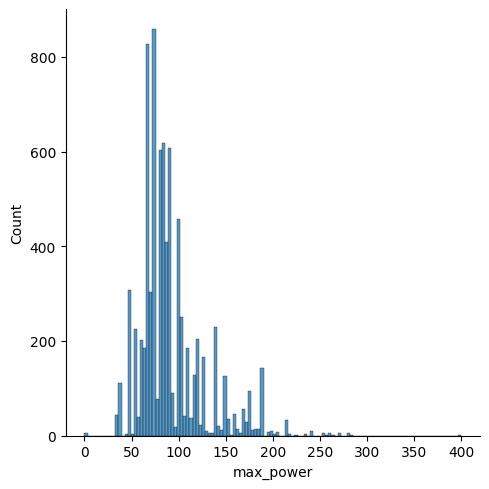

In [58]:
# Distribution plot for max_power
sns.displot(data=df, x = 'max_power')


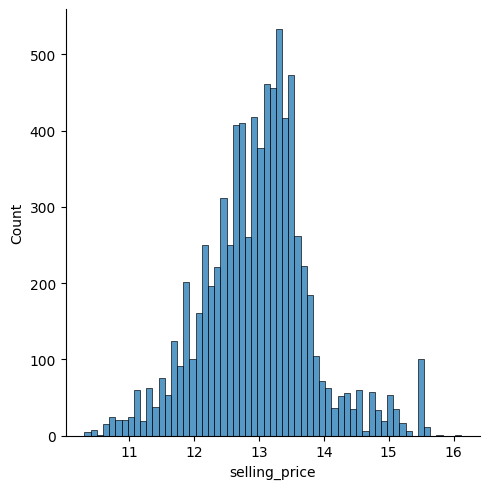

In [59]:
# Distribution plot for selling price
sns.displot(data=df, x = 'selling_price')


Scalling

In [36]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [37]:
print('shape of X train:', X_train.shape)
print('shape of X test:', X_test.shape)
print('shape of y train:', y_train.shape)
print('shape of X test:' ,y_test.shape)



shape of X train: (5619, 2)
shape of X test: (2409, 2)
shape of y train: (5619,)
shape of X test: (2409,)


Checking outliers

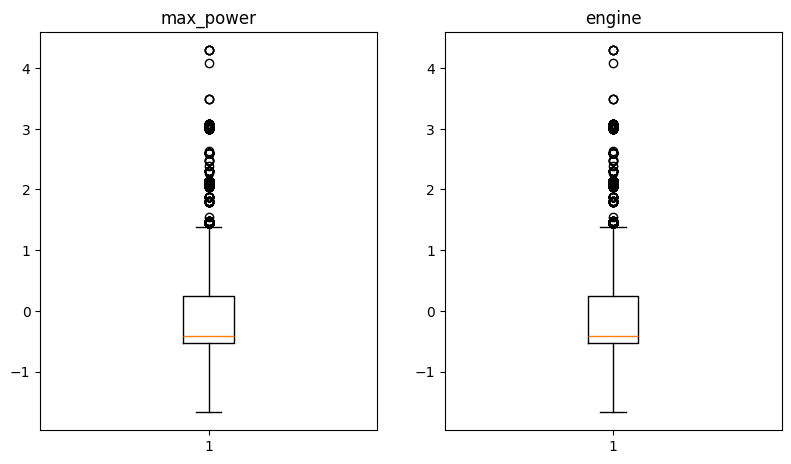

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [72]:
# Create a dictionary of columns.
col_dict = {'max_power':1,'engine':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i + 1)
                     plt.boxplot(X_train[:, 1])
                     plt.title(variable)

plt.show()


#----------------------------------------------------------------#
def outlier_count(col, data = X_train):

    # calculating 75 and 25 eprcent quatile
    q75, q25 = np.percentile(data[col], [75, 25])
   # this will calculate interquartile
    iqr = q75 - q25

    #checking maximum and minimum value
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # counting number of outliers
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])

    # outliers percentage
    outlier_percent = round(outlier_count/len(data[col])*100, 2)

    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))
#=========================================================================================
for col in X_train.columns:
    outlier_count(col)  





Modelling

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0),
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [76]:
from sklearn.model_selection import KFold, cross_val_score
#cross validation to see the best algorithms
#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.35263503 -0.32303786 -0.34694073 -0.3367     -0.36131629]; Mean: -0.34412598164746566
SVR - Score: [-0.28021009 -0.31248666 -0.2755216  -0.32397039 -0.30206689]; Mean: -0.29885112810265557
KNeighbors Regressor - Score: [-0.13587552 -0.12601606 -0.14404313 -0.14617198 -0.12966592]; Mean: -0.13635452247177193
Decision-Tree Regressor - Score: [-0.11312421 -0.13056117 -0.1048046  -0.10680242 -0.11293901]; Mean: -0.11364628259997692
Random-Forest Regressor - Score: [-0.11264533 -0.11251913 -0.12062055 -0.10697354 -0.09603622]; Mean: -0.10975895232915081


From the above cross validation we can clearly see the best algorithm, Random Forest which has the lowest MSE, defeating decision tree by a small margin. So we'll finalize this algorithm.

Grid Search

In [77]:
# Import the necessary library for grid search and model evaluation
from sklearn.model_selection import GridSearchCV

# Define a dictionary with hyperparameter values to search over
param_grid = {'bootstrap': [True],  # Whether to use bootstrapping when building trees
              'max_depth': [5, 10, None],  # Maximum depth of decision trees
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]  # Number of trees in the forest
             }

# Create a Random Forest Regressor with a fixed random seed
rf = RandomForestRegressor(random_state=2)

# Initialize a GridSearchCV object to perform hyperparameter tuning
grid = GridSearchCV(estimator=rf,  # The model to be tuned
                    param_grid=param_grid,  # The parameter grid to search over
                    cv=kfold,  # Cross-validation strategy (assumed to be defined elsewhere)
                    n_jobs=-1,  # Use all available CPU cores for parallelization
                    return_train_score=True,  # Record training scores for each parameter combination
                    refit=True,  # Refit the best model on the entire training dataset
                    scoring='neg_mean_squared_error'  # Evaluation metric (lower values are better)
                   )

# Fit the grid search to the training data, searching for the best hyperparameters
grid.fit(X_train, y_train)  # This initiates the grid search process


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(random_state=2), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [78]:
grid.best_params_
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse 

-0.11073816034623116

Testing

In [79]:
# Import the necessary library for calculating the mean squared error
from sklearn.metrics import mean_squared_error

# Use the trained grid search model to make predictions on the test data
yhat = grid.predict(X_test)

# Calculate the mean squared error between the true target values (y_test) and predicted values (yhat)
mse = mean_squared_error(y_test, yhat)




0.11603067665017613

The mse variable now contains the mean squared error, which is a measure of prediction accuracyLower values of mean squared error indicate better model performance

Feature Importance

Algorithm way

In [80]:
#stored in this variable
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.86464458, 0.13535542])

<BarContainer object of 2 artists>

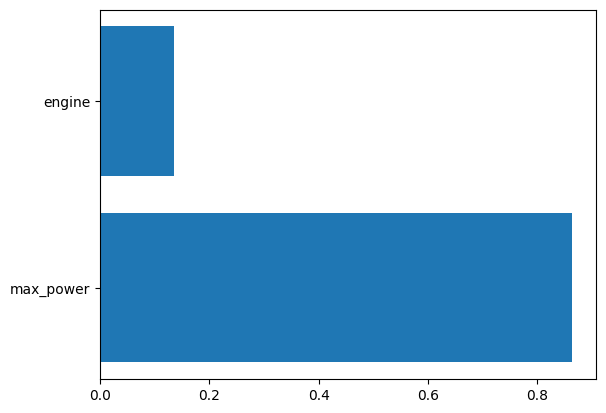

In [81]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

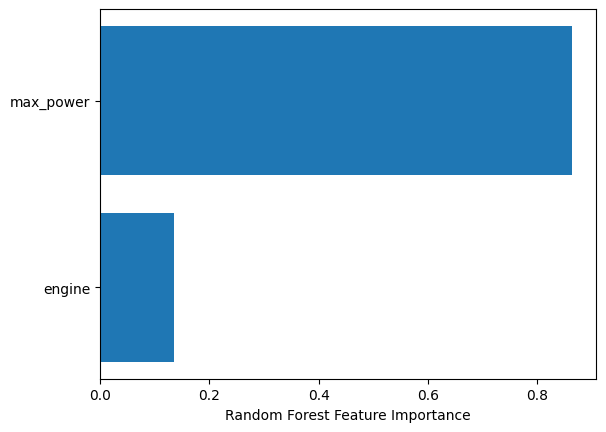

In [82]:
#sorting 
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Permutation Way

Text(0.5, 0, 'Random Forest Feature Importance')

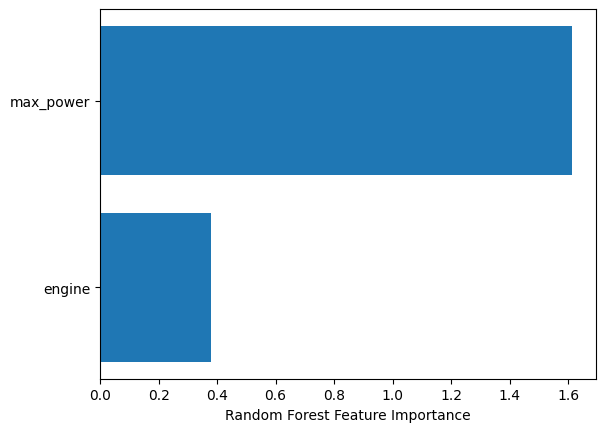

In [83]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

Shap Way

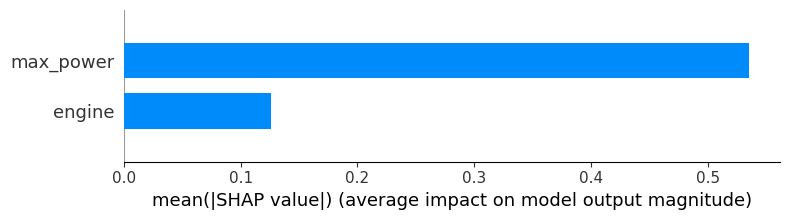

In [84]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

Inference

In [85]:
import pickle

# save the model to disk
filename = '../model/finalprediction.model'
pickle.dump(grid, open(filename, 'wb'))
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [87]:
selling_price_model = pickle.load(open("../model/finalprediction.model", "rb"))
# Load a pre-trained machine learning model for predicting car selling prices
import pickle

# Create a sample data point for prediction with two features: "max_power" and "engine"
sample = {
    "max_power": [10],
    "engine": [1590]
}

# Convert the sample data into a Pandas DataFrame for processing
sample = pd.DataFrame(sample)

# Scale the sample data using the same scaler used during model training
scaled_sample = scaler.transform(sample)

# Use the pre-trained model to predict the selling price of the car
predicted_selling_price = selling_price_model.predict(scaled_sample)

# Reverse the log transformation applied during training to obtain the final predicted selling price
predicted_selling_price = np.exp(predicted_selling_price)

# Print the predicted selling price of the car model
print("Predicted selling price of this car model is: " + str(predicted_selling_price[0]))


Predicted selling price of this car model is: 259953.04683579906


Brief Summary

SUMMARY

The project on Car Price Prediction has been implemented covering the requirements of the car company. 8129 sample of data were given by the client at the beginning, although some of the sample contained impure values. Some of initial details of the project has been listed below:

Number of raw sample given: 8129

Strong features: So, according to the correlation matrix, we can clearly assume that maximum power and engine size has major relation with the target variable. So, as the engine size and max power increase, the predicted price of the car should also increase. 
But, if we take a real world example, mileage and km_driven plays a vital role in reducing car price which is also negatively correlated in the above correlation matrix.
Talking about the most important and non important features amongst the 12 features, year, owner, transmission, seats, fuel, and torque have been seen as the least important feature for this project. AS the owner of this company doesn't been comfortable with torque, their request to completely dropping the features has been fulfilled.

Algorithm Used: Random Forest with mean squared error of 0.109
Linear Regression : Mean: -0.34412598164746566
SVR - Score: Mean: -0.29885112810265557
KNeighbors Regressor: Mean: -0.13635452247177193
Decision-Tree Regressor : Mean: -0.11364628259997692
Random-Forest Regressor :Mean: -0.10975895232915081

Best MSE for grid search : -.11

Final mse using test split : 0.11




